In [23]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [2]:
df = pd.read_csv('/content/CC GENERAL_Clustering.csv')

CUST_ID: Идентификация владельца кредитной карты (категориальный).

BALANCE: сумма остатка на счету для совершения покупок

BALANCE_FREQUENCY: частота обновления баланса, оценка от 0 до 1 (1 = часто обновляется, 0 = обновляется нечасто).

PURCHASES: Сумма покупок, совершенных со счета.

ONEOFF_PURCHASES: максимальная сумма покупки, совершенная за один раз.

INSTALLMENTS_PURCHASES: сумма покупки, осуществленная в рассрочку.

CASH_ADVANCE: наличные, предоставленные пользователем заранее.

PURCHASES_FREQUENCY: частота совершения покупок, оценка от 0 до 1 (1 = часто покупаются, 0 = покупаются нечасто).

ONEOFF_PURCHASES_FREQUENCY: как часто совершаются покупки за один раз (1 = часто покупаются, 0 = покупаются нечасто).

PURCHASES_INSTALLMENTS_FREQUENCY: как часто совершаются покупки в рассрочку (1 = часто, 0 = не часто).

CASH_ADVANCE_FREQUENCY: как часто выплачивается аванс наличными.

CASH_ADVANCE_TRX: количество транзакций, совершенных с помощью «Cash in Advanced».

PURCHASES_TRX: количество совершенных транзакций покупки.

CREDIT_LIMIT: лимит кредитной карты для пользователя.

PAYMENTS: Сумма платежа, произведенного пользователем.

MINIMUM_PAYMENTS: Минимальная сумма платежей, совершаемых пользователем.

PRC_FULL_PAYMENT: процент от полной оплаты, оплаченный пользователем.

TENURE: Срок действия кредитной карты для пользователя.

In [ ]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<Axes: >

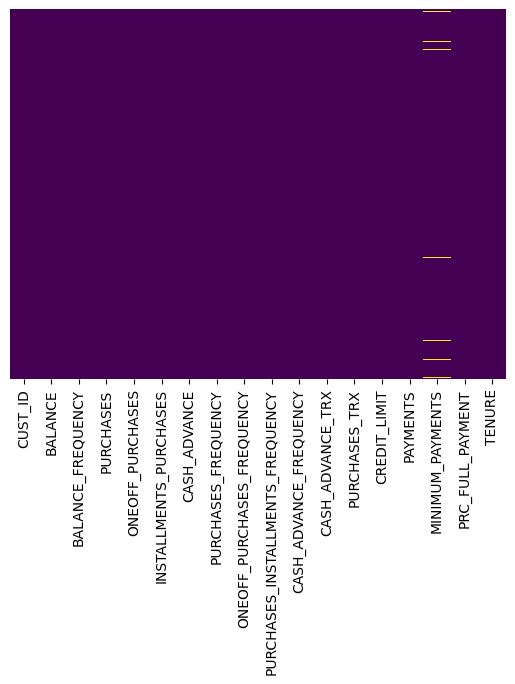

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.size - df.drop_duplicates().size # Дубликатов нет

0

In [10]:
for i in df.columns:
  values = df[i].unique().size
  print(i, '|', values)
  if values < 10:
    print(df[i].unique())

  print()

print('Amout of values:', df.size)

CUST_ID | 8950

BALANCE | 8871

BALANCE_FREQUENCY | 43

PURCHASES | 6203

ONEOFF_PURCHASES | 4014

INSTALLMENTS_PURCHASES | 4452

CASH_ADVANCE | 4323

PURCHASES_FREQUENCY | 47

ONEOFF_PURCHASES_FREQUENCY | 47

PURCHASES_INSTALLMENTS_FREQUENCY | 47

CASH_ADVANCE_FREQUENCY | 54

CASH_ADVANCE_TRX | 65

PURCHASES_TRX | 173

CREDIT_LIMIT | 206

PAYMENTS | 8711

MINIMUM_PAYMENTS | 8637

PRC_FULL_PAYMENT | 47

TENURE | 7
[12  8 11  9 10  7  6]

Amout of values: 161100


# Заполняем отсутствующие значения

In [11]:
df[df['MINIMUM_PAYMENTS'].notnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [15]:
df[(df['MINIMUM_PAYMENTS'] > df['PAYMENTS'])]
# Минимальная сумма покупки всегда меньше, либо равна сумме покупки
# - данное правило не подтвердилось

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.00,12
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,C19174,735.652303,1.000000,619.60,255.62,363.98,546.902403,1.000000,0.166667,0.833333,0.166667,5,16,1000.0,106.138603,337.294767,0.00,6
8939,C19180,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


In [16]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


<Axes: >

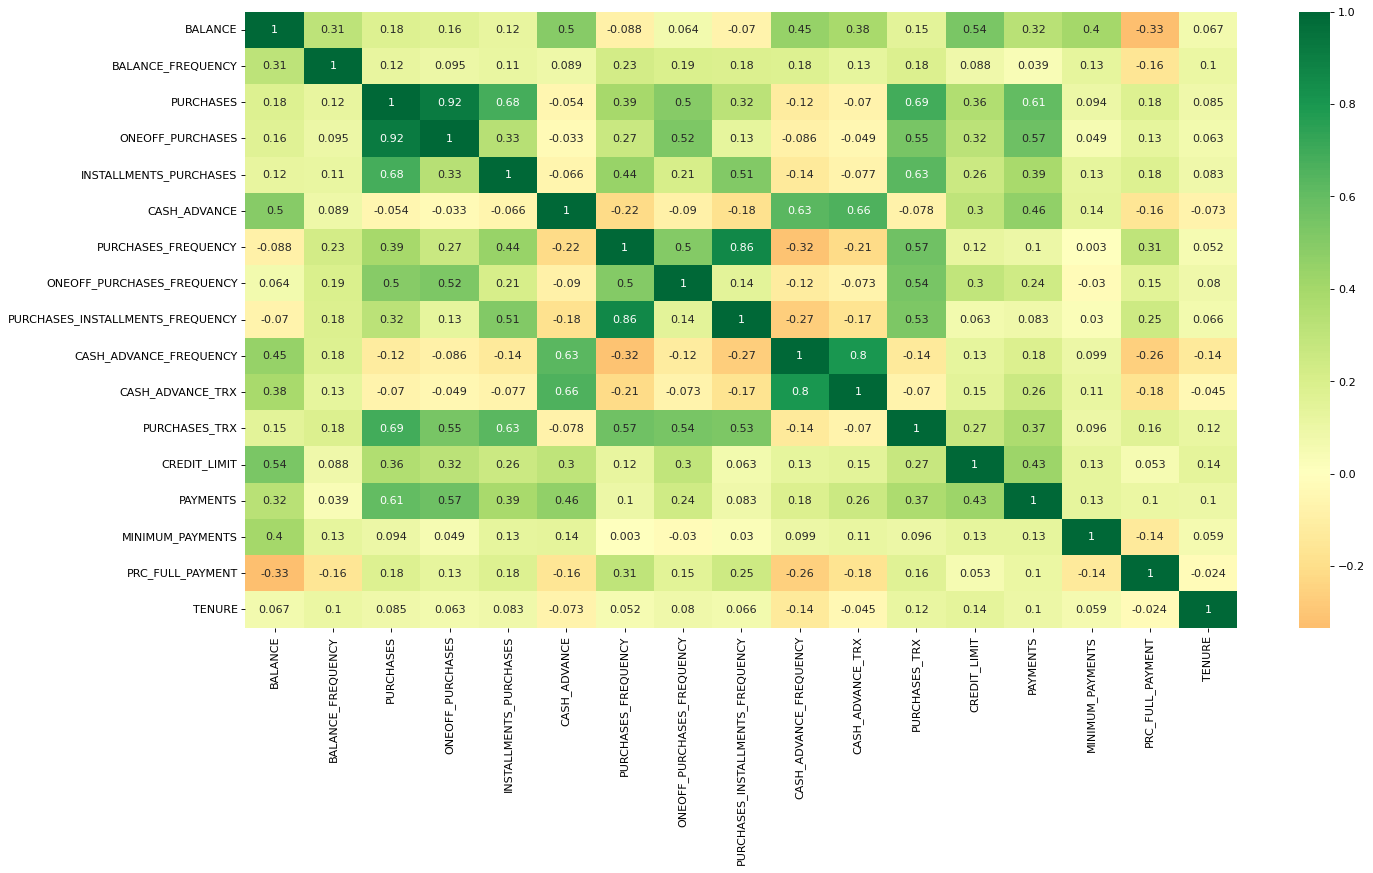

In [21]:
data = df.drop(columns=['CUST_ID'])

plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

<Axes: xlabel='CASH_ADVANCE_FREQUENCY', ylabel='CASH_ADVANCE_TRX'>

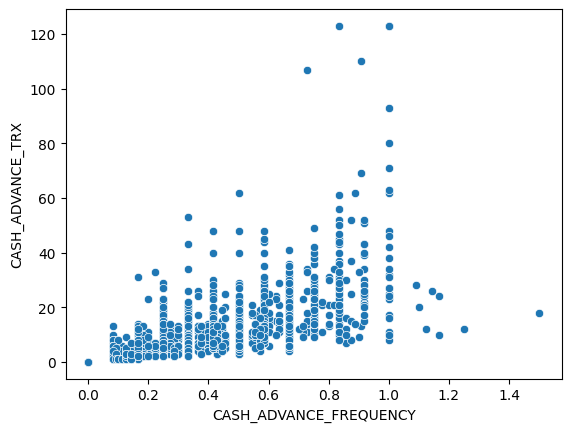

In [36]:
sns.scatterplot(x = 'CASH_ADVANCE_FREQUENCY', y = 'CASH_ADVANCE_TRX', data=df)

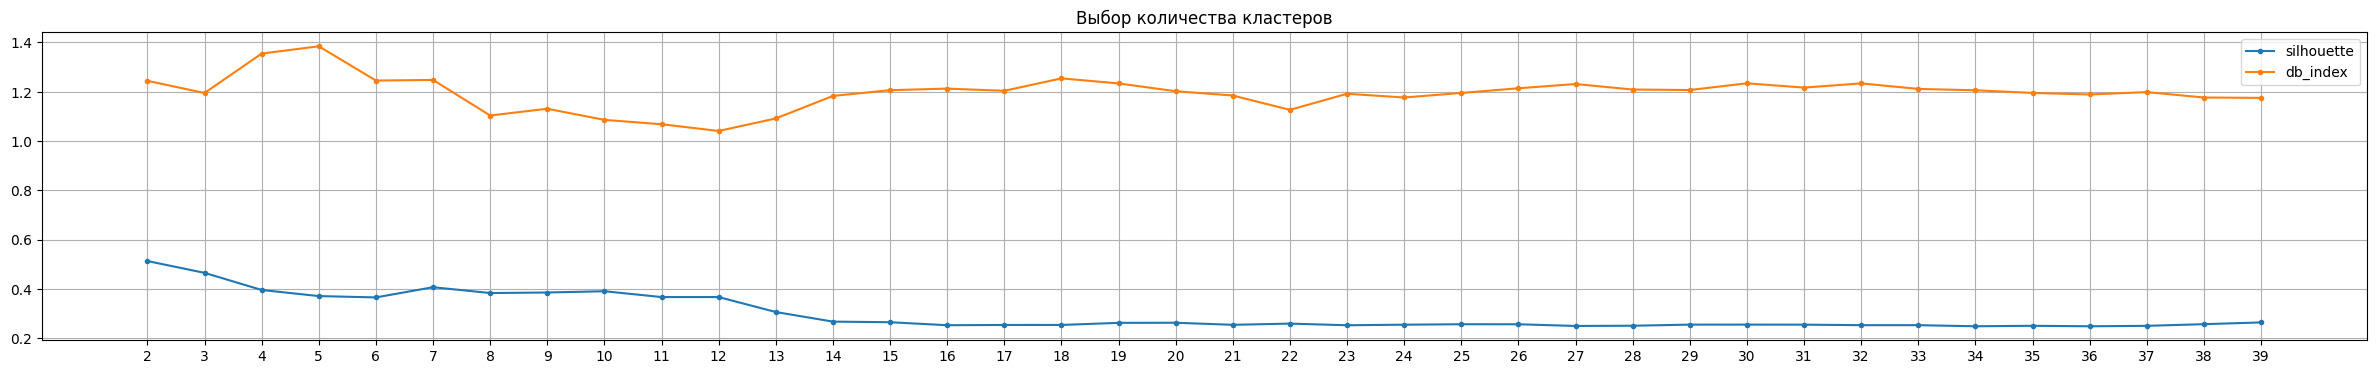

In [32]:
x = df.drop(columns=['CUST_ID'])

metrics = {'silhouette':[], 'db_index': [], 'ch_index': []}
neighbors = np.arange(2, 40)

for i in range(2, 40):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(x)
  y_kmeans = kmeans.predict(x)

  metrics['silhouette'].append(silhouette_score(x, kmeans.labels_))
  metrics['db_index'].append(davies_bouldin_score(x, kmeans.labels_))
  metrics['ch_index'].append(calinski_harabasz_score(x, kmeans.labels_))

fig = plt.figure(figsize=(30, 4))
ax = fig.add_subplot()

for i in ['silhouette', 'db_index']:
  ax.plot(neighbors, metrics[i], marker='.', label = str(i))

ax.set_title('Выбор количества кластеров')
ax.xaxis.set_major_locator(ticker.FixedLocator(neighbors))
ax.legend()
ax.grid()

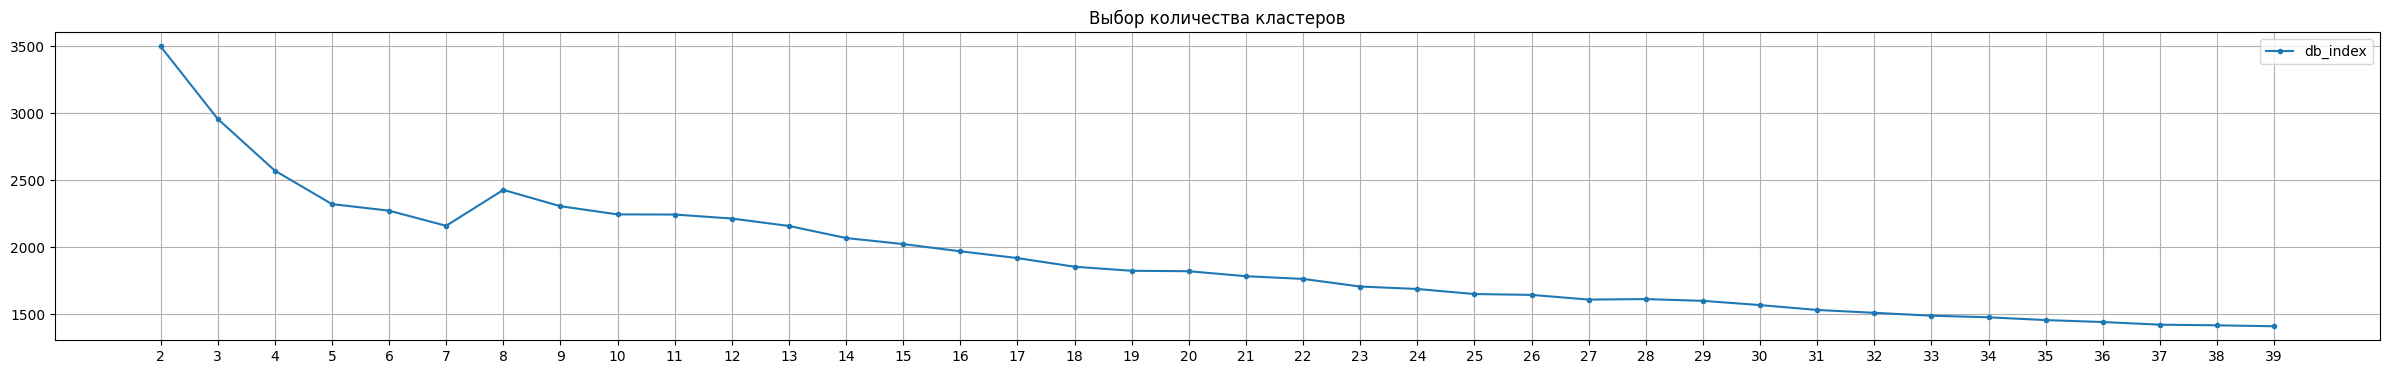

In [33]:
fig = plt.figure(figsize=(30, 4))
ax = fig.add_subplot()
ax.plot(neighbors, metrics['ch_index'], marker='.', label = str(i))

ax.set_title('Выбор количества кластеров')
ax.xaxis.set_major_locator(ticker.FixedLocator(neighbors))
ax.legend()
ax.grid()

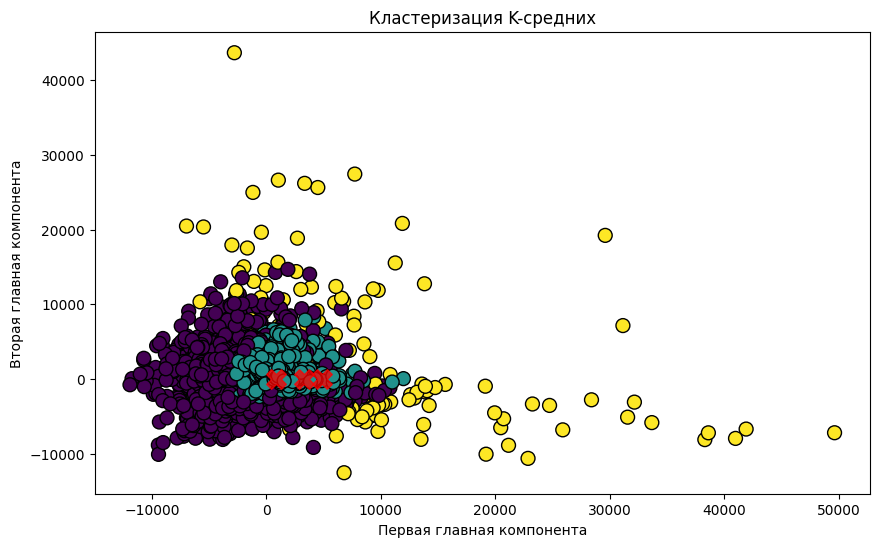

Silhouette Score: 0.47
Davies-Bouldin Index: 1.15
Calinski-Harabasz Index: 3684.65


In [34]:
x = df.drop(columns=['CUST_ID', 'TENURE', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

y_kmeans = kmeans.predict(x)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)

# Визуализируем кластеры
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Кластеризация K-средних')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

silhouette = silhouette_score(x, kmeans.labels_)
db_index = davies_bouldin_score(x, kmeans.labels_)
ch_index = calinski_harabasz_score(x, kmeans.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

In [ ]:
# https://www.geeksforgeeks.org/clustering-metrics/